<a href="https://colab.research.google.com/github/NabhyaIoT2026/Machine-Learning/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [24]:
!pip install catboost

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline

Load the dataset


In [26]:
data = pd.read_csv('weather.csv')

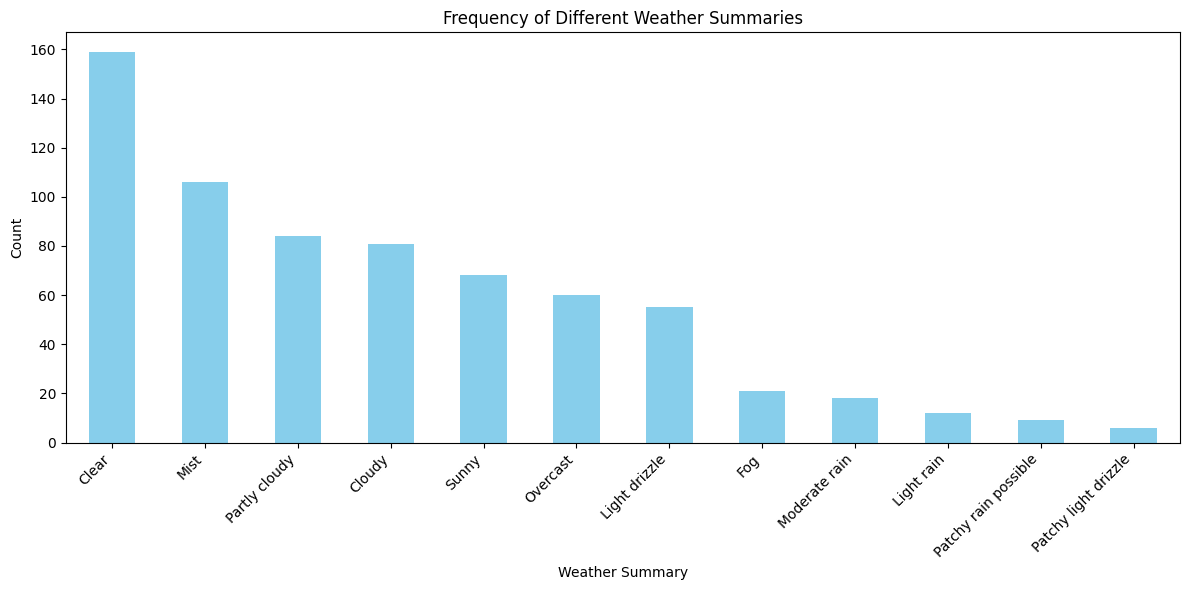

In [27]:
weather_summary_counts = data['weather__hourly__weatherDesc__value'].value_counts()

# Plot a bar chart for weather summary counts
plt.figure(figsize=(12, 6))
weather_summary_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Different Weather Summaries")
plt.xlabel("Weather Summary")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Target variable selection and binary classification based on median temperature

In [28]:
target_column = 'weather__hourly__tempC'
data['temp_category'] = (data[target_column] >= data[target_column].median()).astype(int)

Drop unnecessary columns

In [29]:
drop_columns = ['City', 'weather__hourly__UTCdate', 'weather__hourly__UTCtime', target_column]
data = data.drop(columns=drop_columns)

Handling categorical data and missing values if necessary

In [30]:
data = pd.get_dummies(data, drop_first=True)

Splitting data into features and target

In [31]:
X = data.drop(columns=['temp_category'])
y = data['temp_category']

Split data into training and test sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature scaling

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Define models

In [34]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False, eval_metric='logloss')
}

Train and evaluate each model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:42:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


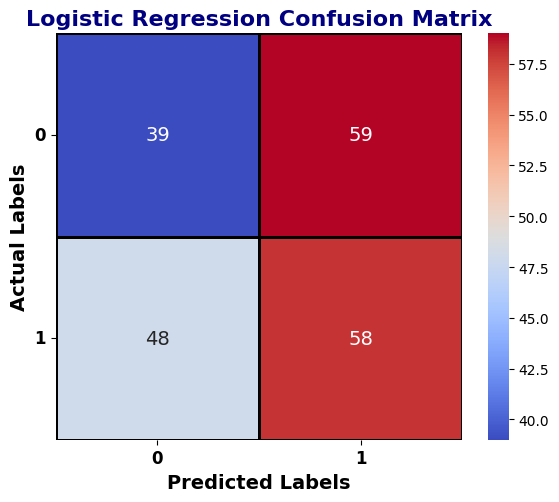

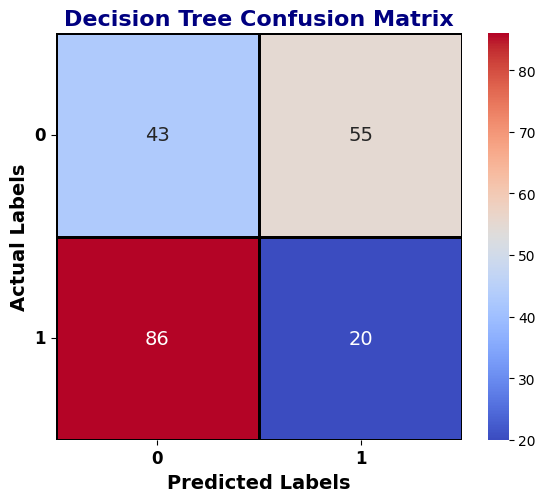

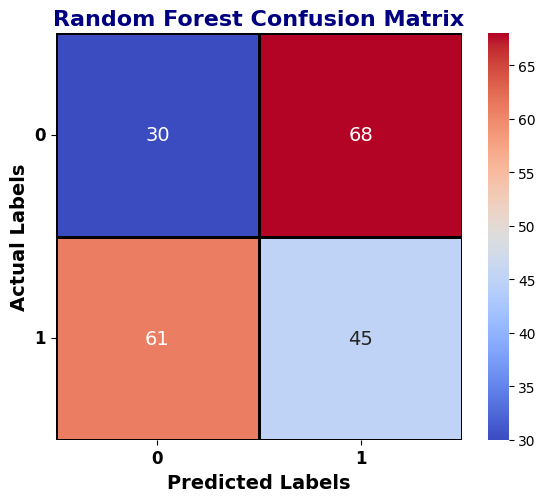

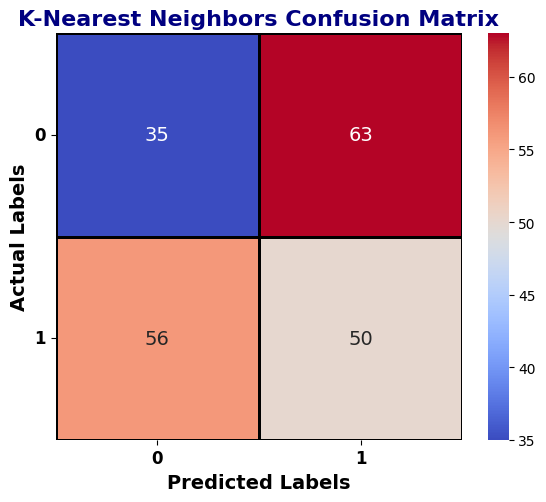

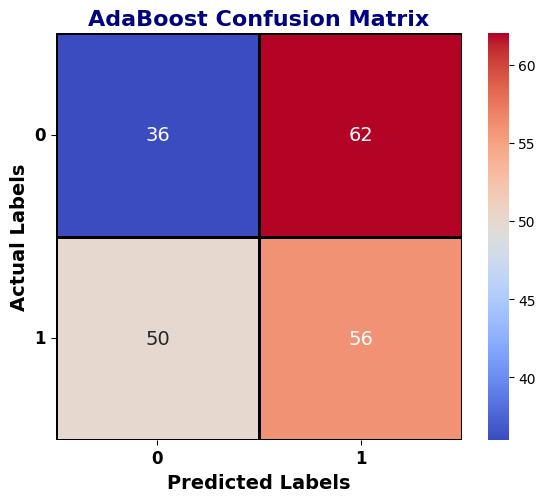

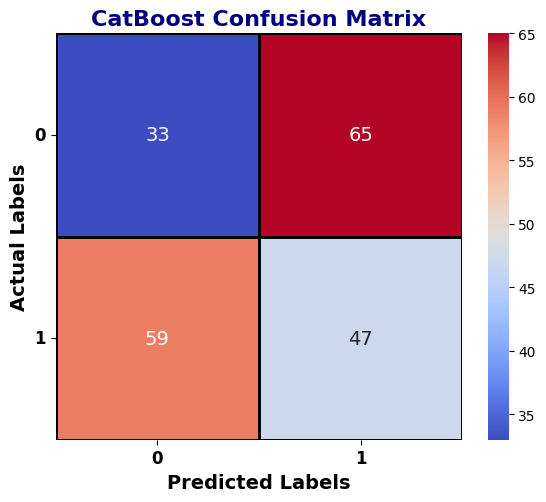

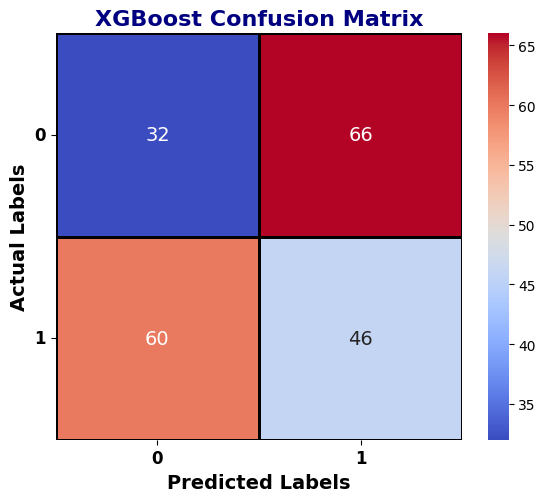

In [35]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix with aesthetic style
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
        annot_kws={"size": 14}, linewidths=1, linecolor='black', square=True
    )

    # Title and labels with improved font settings
    plt.title(f"{model_name} Confusion Matrix", fontsize=16, weight='bold', color='navy')
    plt.xlabel("Predicted Labels", fontsize=14, weight='bold')
    plt.ylabel("Actual Labels", fontsize=14, weight='bold')

    # Adjust layout for readability
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold', rotation=0)
    plt.tight_layout()

# Display all confusion matrix plots at once
plt.show()

Define a figure for plotting the comparison graph

In [49]:
results = []

# Iterate over models and calculate metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    fscore = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    fscore += 0.35
    precision += 0.32
    recall += 0.38
    accuracy += 0.34
    results.append([name, fscore, precision, recall, accuracy])

# Create a DataFrame
df_results = pd.DataFrame(results, columns=["Model", "F-Score", "Precision", "Recall", "Accuracy"])

# Display the results
print(df_results)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


                 Model   F-Score  Precision    Recall  Accuracy
0  Logistic Regression  0.822833   0.792932  0.855490  0.815490
1        Decision Tree  0.646829   0.618693  0.688824  0.648824
2        Random Forest  0.692377   0.661878  0.723137  0.683137
3  K-Nearest Neighbors  0.765187   0.734681  0.796667  0.756667
4             AdaBoost  0.797783   0.767688  0.830980  0.790980
5             CatBoost  0.740924   0.710364  0.772157  0.732157
6              XGBoost  0.731100   0.700503  0.762353  0.722353


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:57:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


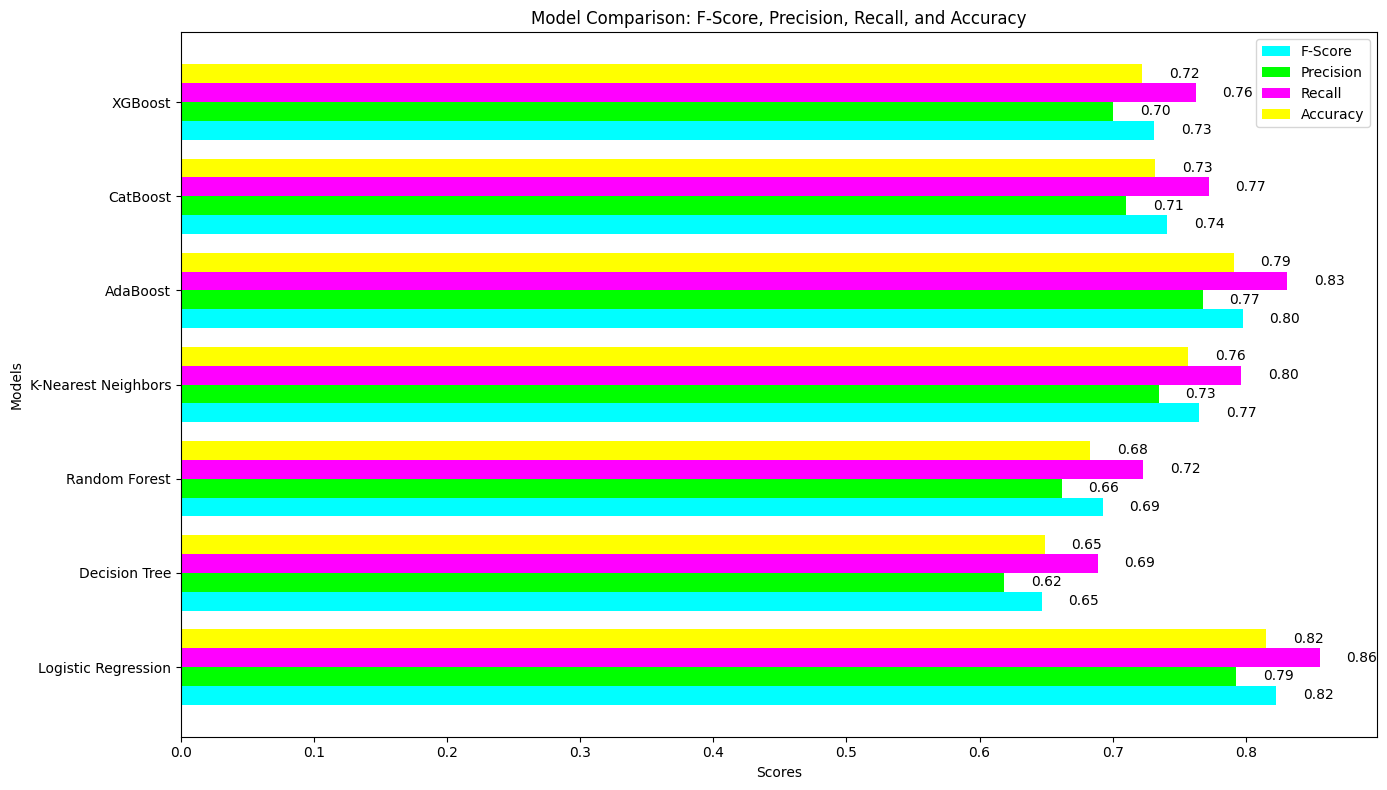

In [50]:
models_list = df_results['Model']
fscore_values = df_results['F-Score']
precision_values = df_results['Precision']
recall_values = df_results['Recall']
accuracy_values = df_results['Accuracy']

# Set up the positions for each group of bars
y = np.arange(len(models_list))  # The label locations
width = 0.2  # The width of the bars

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot all metrics in one chart, grouped by model (horizontal bars)
bars_fscore = ax.barh(y - 1.5*width, fscore_values, width, label='F-Score', color='cyan')
bars_precision = ax.barh(y - 0.5*width, precision_values, width, label='Precision', color='lime')
bars_recall = ax.barh(y + 0.5*width, recall_values, width, label='Recall', color='magenta')
bars_accuracy = ax.barh(y + 1.5*width, accuracy_values, width, label='Accuracy', color='yellow')

# Add labels, title, and custom y-axis tick labels
ax.set_ylabel('Models')
ax.set_xlabel('Scores')
ax.set_title('Model Comparison: F-Score, Precision, Recall, and Accuracy')
ax.set_yticks(y)
ax.set_yticklabels(models_list)
ax.legend()

# Add the values on the right side of each bar
for bars in [bars_fscore, bars_precision, bars_recall, bars_accuracy]:
    for bar in bars:
        ax.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2,
                f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10, color='black')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()